<a href="https://colab.research.google.com/github/attruong00/ml-final/blob/main/Zach_FinalProject_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Enter your name(s) here
# Abbey Truong att837
# Ben Truong bst574
# Kamil Kalowski ktk582
# Zach Cramer zc5455

# Using Machine Learning to Predict Company Bankruptcy  

In this project we employ a variety of statistical methods in an effort to predict whether or not a company will go bankrupt. The data was collected from the Taiwann Economic Journal between 1999 and 2009. Bankruptcy was determined on metrics outlined by the business regulations of the Taiwan Stock Exchange.

Dataset: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?resource=download

In [1]:
#You may add additional imports
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import statistics
import numpy as np
import sklearn as sk
from sklearn import model_selection, tree, metrics, naive_bayes, preprocessing, decomposition, neighbors, pipeline, svm
from scipy import stats
import matplotlib.pyplot as plt
import time

# Data Preparation 



In [ ]:
%matplotlib inline

In [8]:
# open file
data = pd.read_csv("data.csv")
# drop any duplicate records
data.drop_duplicates(inplace=True)
# fill in missing values with mean values
data.fillna(data.mean(), inplace=True)

(data.head(60))

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [9]:
# Use decision tree to determine the best number of features
from sklearn.model_selection import GridSearchCV
# features = data.iloc[:,1:96]
# labels = data.iloc[:, 0:1]
# labels = labels.values.ravel()

trainFeatures = []
trainLabels = []
testFeatures = []
testLabels = []

features = []
labels = []

#We shouldn't actually split these right here
trainFeatures, testFeatures, trainLabels, testLabels = sk.model_selection.train_test_split(data.iloc[:, 1:96], data.iloc[:, 0:1], train_size = 0.8, test_size = 0.2, random_state = 42)
features = data.iloc[:, 1:96]
labels = data.iloc[:, 0:1]
# we want to find which features are consistently the most important
bestParams = 0
cumulative_best_features = np.array([0.0 for i in range(95)])
for i in range(1):
    # decTreeTest = decTreeTest.fit(trainFeatures, trainLabels)

    Hyperparameters={'max_features':np.arange(1,95,5)}
    dectree= tree.DecisionTreeClassifier(random_state=42)
    cv_grid = GridSearchCV(estimator= dectree ,param_grid = Hyperparameters, 
                           scoring ='accuracy',cv = 5)
    cv_grid= cv_grid.fit(features, labels)
    bestParams = cv_grid
    print(cv_grid.best_params_)




{'max_features': 21}


In [68]:
featImport = cv_grid.best_estimator_.feature_importances_

best_max_features = cv_grid.best_params_['max_features']

cumulative_feature_importances = pd.DataFrame(cv_grid.best_estimator_.feature_importances_,
                                index = trainFeatures.columns,
                                columns = ['importance']).sort_values('importance', 
                                                                    ascending=False)
cumulative_feature_importances.head(best_max_features)

reduced_feature_names = cumulative_feature_importances.head(best_max_features).index.values
print(reduced_feature_names)

reduced_train_features = trainFeatures.loc[:,reduced_feature_names]
reduced_test_features = testFeatures.loc[:, reduced_feature_names]
reduced_train_features.head(10)

[' Borrowing dependency' ' Net Value Growth Rate'
 ' ROA(B) before interest and depreciation after tax'
 ' Interest Coverage Ratio (Interest expense to EBIT)'
 ' Total Asset Return Growth Rate Ratio' ' No-credit Interval'
 ' Average Collection Days' ' Retained Earnings to Total Assets'
 ' Current Liability to Equity' ' Cash/Total Assets'
 ' Persistent EPS in the Last Four Seasons' ' Realized Sales Gross Margin'
 ' Fixed Assets Turnover Frequency' ' Quick Ratio'
 ' Current Liability to Current Assets' ' Revenue per person'
 ' Per Share Net profit before tax (Yuan ¥)'
 ' Accounts Receivable Turnover' ' Degree of Financial Leverage (DFL)'
 ' Net Income to Total Assets' ' Current Liabilities/Equity']


,Borrowing dependency,Net Value Growth Rate,ROA(B) before interest and depreciation after tax,Interest Coverage Ratio (Interest expense to EBIT),Total Asset Return Growth Rate Ratio,No-credit Interval,Average Collection Days,Retained Earnings to Total Assets,Current Liability to Equity,Cash/Total Assets,...,Realized Sales Gross Margin,Fixed Assets Turnover Frequency,Quick Ratio,Current Liability to Current Assets,Revenue per person,Per Share Net profit before tax (Yuan ¥),Accounts Receivable Turnover,Degree of Financial Leverage (DFL),Net Income to Total Assets,Current Liabilities/Equity
3759,0.378194,0.000433,0.544622,0.566658,0.263600,0.623649,0.007710,0.940112,0.330333,0.032719,...,0.599036,1.913939e-04,0.005780,0.031490,0.020366,0.175943,0.000820,0.027239,0.801313,0.330333
1782,0.374378,0.000469,0.558863,0.565395,0.264168,0.623932,0.010125,0.937921,0.333230,0.207601,...,0.609334,5.545128e-03,0.007728,0.024709,0.026597,0.177299,0.000625,0.026843,0.810914,0.333230
5013,0.373293,0.000536,0.554687,0.565484,0.263670,0.623714,0.007109,0.943937,0.328602,0.061019,...,0.614055,3.154596e-04,0.005343,0.033789,0.006357,0.183776,0.000889,0.026864,0.809740,0.328602
5412,0.379327,0.000478,0.546764,0.565820,0.264225,0.623986,0.006349,0.936050,0.338004,0.018261,...,0.597825,1.985807e-03,0.007319,0.031170,0.141551,0.186563,0.000996,0.026951,0.810082,0.338004
3066,0.372543,0.000442,0.529150,0.565848,0.263924,0.623845,0.009149,0.936134,0.332926,0.014452,...,0.600362,8.745114e-04,0.007495,0.033229,0.046103,0.178203,0.000692,0.026959,0.804638,0.332926
3204,0.374816,0.000428,0.517426,0.564066,0.263718,0.623591,0.007685,0.927333,0.328254,0.036013,...,0.595267,3.560000e+09,0.006751,0.034430,0.005508,0.162537,0.000824,0.026603,0.781277,0.328254
2499,0.371236,0.000474,0.619573,0.565194,0.263661,0.632213,0.000408,0.967305,0.327421,0.001967,...,0.642824,1.127182e-04,0.000147,0.916814,0.049525,0.210891,0.015503,0.026799,0.857531,0.327421
3195,0.372124,0.000414,0.532523,0.564712,0.263237,0.623663,0.007190,0.923992,0.328290,0.074751,...,0.598466,8.090000e+09,0.007264,0.033287,0.006237,0.159072,0.000881,0.026705,0.771614,0.328290
4461,0.370367,0.000448,0.527384,0.565744,0.263851,0.623788,0.004183,0.943536,0.330262,0.150690,...,0.600578,3.517715e-04,0.006545,0.034859,0.021553,0.174060,0.001512,0.026930,0.799975,0.330262
3927,0.369637,0.000531,0.546121,0.565159,0.264125,0.624892,0.009070,0.935300,0.327279,0.263469,...,0.609183,7.269943e-04,0.036499,0.007222,0.024206,0.174964,0.000698,0.026791,0.808044,0.327279


### Data Exploration

Number of bankrupt companies: 220
Number of non-bankrupt companies: 6599


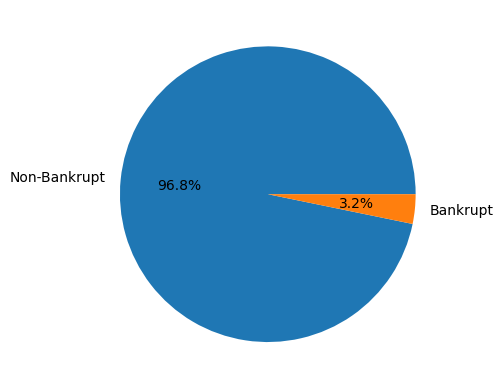

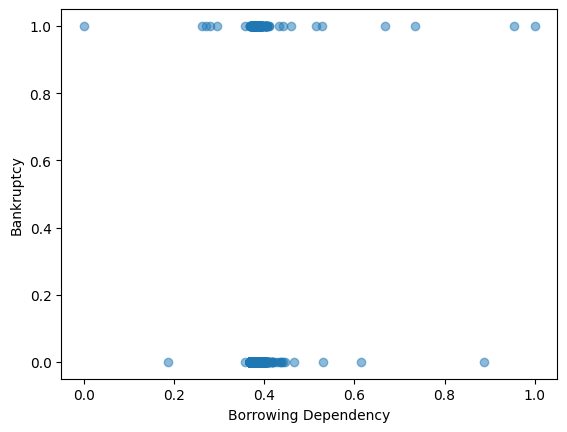

Total bankruptcies of companies with a borrowing dependency (BD) of greather than or equal to .35:  24 

Total bankruptcies of companies with a borrowing dependency (BD) of less than .35:  196 

Percentage of companies that go bankrupt with a BD of greather than or equal to .35:  0.3429 

Percentage of companies that go bankrupt with a BD of less than .35:  0.3429 



In [73]:
import seaborn as sns
dataTest = data.copy(deep = True)

num_bankrupt = sum(data['Bankrupt?'])
num_nonBankrupt = len(labels) - num_bankrupt

print("Number of bankrupt companies:", num_bankrupt)
print("Number of non-bankrupt companies:", num_nonBankrupt)

denomination = 'Non-Bankrupt', 'Bankrupt'
sizes = [num_nonBankrupt, num_bankrupt]

fig, ax = plt.subplots()
ax.pie(sizes, labels=denomination, autopct='%1.1f%%')

bdScatter = plt.figure("Borrowing Dependency & Bankruptcy")
plt.scatter(data[' Borrowing dependency'], data['Bankrupt?'], alpha=0.5)
plt.xlabel('Borrowing Dependency')
plt.ylabel('Bankruptcy')
plt.show()

# dataTest[' Borrowing dependcy >= 0.2'] = dataTest[' Borrowing dependency'].apply(lambda x: 1 if x >= 0.2 else 0)
# dataTest[' Borrowing dependcy < 0.2'] = dataTest[' Borrowing dependency'].apply(lambda x: 1 if x < 0.2 else 0)

bdlt_bankruptcies = 0
bgt_bankruptcies = 0
bdlt_total = 0
bgt_total = 0
for i in range(len(data)):
  if(data.iloc[i][' Borrowing dependency'] >= 0.4):
    bgt_total +=1
    if(data.iloc[i]['Bankrupt?'] == 1):
      bgt_bankruptcies += 1
  elif(data.iloc[i][' Borrowing dependency'] < 0.4):
    bdlt_total +=1
    if(data.iloc[i]['Bankrupt?'] == 1):
      bdlt_bankruptcies += 1
 

bgt_bankruptcies_pct = float(bgt_bankruptcies)/bgt_total
bdlt_bankruptcies_pct = float(bgt_bankruptcies)/bgt_total
bdlt_bankruptcies_pct = round(bdlt_bankruptcies_pct, 4)
bgt_bankruptcies_pct = round(bgt_bankruptcies_pct, 4)
print("Total bankruptcies of companies with a borrowing dependency (BD) of greather than or equal to .35: ", bgt_bankruptcies, "\n")
print("Total bankruptcies of companies with a borrowing dependency (BD) of less than .35: ",bdlt_bankruptcies, "\n")
print("Percentage of companies that go bankrupt with a BD of greather than or equal to .35: ", bgt_bankruptcies_pct, "\n")
print("Percentage of companies that go bankrupt with a BD of less than .35: ", bdlt_bankruptcies_pct, "\n")


# Separate the target variable (bankruptcy) from the features
feat = reduced_train_features[[' Borrowing dependency', ' Net Value Growth Rate']]



### Ensemble + Random Forests




In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()

param_grid = {'n_estimators': [50, 100, 150]}

grid_search = GridSearchCV(rfc, param_grid, cv = 5)
rfc_scores = cross_val_score(grid_search, reduced_train_features, trainLabels, cv = 5)


grid_search.fit(reduced_train_features, trainLabels)
print(classification_report(testLabels, grid_search.predict(reduced_test_features)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.69      0.18      0.28        51

    accuracy                           0.97      1364
   macro avg       0.83      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364



### ADA Boost Classifier
- Random Forests builds its base estimators independently, using bagging. There is another method of training ensemble classifiers called boosting. Here the classifiers are trained sequentially and each time the sampling of the training set depends on the performance of previously generated models.




In [59]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_classifier = AdaBoostClassifier()

param_grid = {'n_estimators': [50, 100, 150]}

grid_search = GridSearchCV(ada_boost_classifier, param_grid, cv=5)

abc_scores = cross_val_score(grid_search, reduced_train_features, trainLabels, cv=5)

grid_search.fit(reduced_train_features, trainLabels)
print(classification_report(testLabels, grid_search.predict(reduced_test_features)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1313
           1       0.57      0.41      0.48        51

    accuracy                           0.97      1364
   macro avg       0.77      0.70      0.73      1364
weighted avg       0.96      0.97      0.96      1364



**Cross Validation**

**Nested Cross Validation**

Q5. Now we want to tune our model to use the best parameters to avoid overfitting to our training data. Grid search is an approach to parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters (hyperparameters) specified in a grid. 
* Use `sklearn.model_selection.GridSearchCV` to find the best `max_depth`, `max_features`, and `min_samples_leaf` for your tree. Use a 5-fold-CV and 'accuracy' for the scoring criteria.
* Try the values [5,10,15,20] for `max_depth` and `min_samples_leaf`. Try [5,10,15] for `max_features`. 
* Print out the best value for each of the tested parameters (`best_params_`).
* Print out the accuracy of the model with these best values (`best_score_`).

Q6. What you did in Q5 performed the _inner_ loop of a nested CV (no test set was held out). What you did in Q4 performed an _outer_ loop of CV (holds out a test set). Now we need to combine them to perform the nested cross-validation that we discussed in class. To do this, you'll need to pass the a `GridSearchCV` into a `cross_val_score`. 

What this does is: the `cross_val_score` splits the data in to train and test sets for the first outer fold, and it passes the train set into `GridSearchCV`. `GridSearchCV` then splits that set into train and validation sets for k number of folds (the inner CV loop). The hyper-parameters for which the average score over all inner iterations is best, is reported as the `best_params_`, `best_score_`, and `best_estimator_`(best decision tree). This best decision tree is then evaluated with the test set from the `cross_val_score` (the outer CV loop). And this whole thing is repeated for the remaining k folds of the `cross_val_score` (the outer CV loop). 

That is a lot of explanation for a very complex (but IMPORTANT) process, which can all be performed with a single line of code!

Be patient for this one to run. The nested cross-validation loop can take some time. A [ * ] next to the cell indicates that it is still running.

Print the accuracy of your tuned, cross-validated model. This is the official accuracy that you would report for your model.

### C. Naive Bayes (NB) & Evaluation Metrics

`sklearn.naive_bayes.GaussianNB` implements the Gaussian Naive Bayes algorithm for classification. This means that the liklihood of continuous features is estimated using a Gaussian distribution. (Refer to slide 13 of the Naive Bayes powerpoint notes.)

Q7. Create a `sklearn.naive_bayes.GaussianNB` classifier. Use `sklearn.model_selection.cross_val_score` to do a 10-fold cross validation on the classifier. Display the accuracy.

In [ ]:
# your code goes here
nb_clf = naive_bayes.GaussianNB()
# nb_clf.fit(feature_vals, class_labels)
accs = model_selection.cross_val_score(
    estimator=nb_clf,
    X=feature_vals,
    y=class_labels,
    cv=10
    
)

acc = np.mean(accs)
print("accuracy: ", acc)

accuracy:  0.5947826086956522


Q8. `cross_val_score` returns the scores of every test fold. There is another function called `cross_val_predict` that returns predicted y values for every record in the test fold. In other words, for each element in the input, `cross_val_predict` returns the prediction that was obtained for that element when it was in the test set. 

* Use `cross_val_predict` and `sklearn.metrics.confusion_matrix` to print the confusion matrix for the classifier.

* Sckit-learn also provides a useful function `sklearn.metrics.classification_report` for evaluating the classifier on a per-class basis. It is a summary of the precision, recall, and F1 score for each class (and support is just the actual class count). Display the classification report for your Naive Bayes classifier.

In [ ]:
# your code goes here
cross_val_preds = model_selection.cross_val_predict(
    estimator=nb_clf, 
    X=feature_vals, 
    y=class_labels, 
    cv=10
)
confusion = metrics.confusion_matrix(y_true=class_labels, y_pred=cross_val_preds)

report = metrics.classification_report(
    y_true=class_labels,
    y_pred=cross_val_preds,
)

print("confusion matrix:\n", confusion)
print(report)

confusion matrix:
 [[500  39]
 [427 184]]
              precision    recall  f1-score   support

           0       0.54      0.93      0.68       539
           1       0.83      0.30      0.44       611

    accuracy                           0.59      1150
   macro avg       0.68      0.61      0.56      1150
weighted avg       0.69      0.59      0.55      1150



Q9. Using `sklearn.metrics.roc_curve` plot a ROC curve for the Naive Bayes classifier. Also calculate the area under the curve (AUC) using `sklearn.metrics.roc_auc_score`.

* We will just do this on a single holdout test set (because it gets more complicated to put this inside of a cross-validation). So, split your data into training and test sets using `sklearn.model_selection.train_test_split`. Do an 80/20 split.
* Fit the Naive Bayes classifier to the training data by calling the `fit` method on the trainng data.
* Now call the `predict_proba` method on your classifier and pass in the test data. This will return a 2D numpy array with one row for each datapoint in the test set and 2 columns. Column index 0 is the probability that this datapoint is in class 0, and column index 1 is the probability that this datapoint is in class 1.
* We are going to say that class 1 (having the disease) is the rare/positive class. To create a ROC curve, pass the actual Y labels and the probabilites of class 1 (column index 1 out of your predict_proba result) into `sklearn.metrics.roc_curve`
* Pass the FPR and TPR that `roc_curve` returns into the plotting code that we have provided you.
* Print the AUC (area under the curve) by using `sklearn.metrics.roc_auc_score`

auc score:  0.6464153228859112


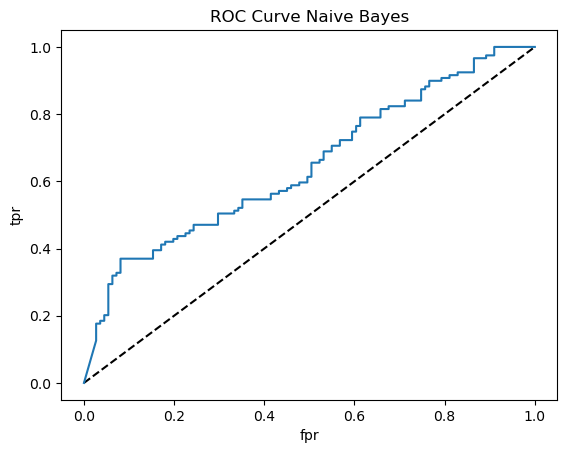

In [ ]:
# your code goes here
# using features_{train, test} and labels_{train, test} from previous part
nb_clf.fit(X=features_train, y=labels_train)

probas = nb_clf.predict_proba(features_test)

#replace these fpr and tpr with the results of your roc_curve
fpr, tpr, thresholds = metrics.roc_curve(y_true=labels_test, y_score=probas[:,1])

auc_score = metrics.roc_auc_score(y_true=labels_test, y_score=probas[:,1])
print("auc score: ",  auc_score)

# Do not change this code! This plots the ROC curve.
# Just replace the fpr and tpr above with the values from your roc_curve
plt.plot([0,1],[0,1],'k--') #plot the diagonal line
plt.plot(fpr, tpr, label='NB') #plot the ROC curve
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.show()

### D. k-Nearest Neighbor (KNN) & Pipelines 

For some classification algorithms, scaling of the data is critical (like KNN, SVM, Neural Nets). For other classification algorithms, data scaling is not necessary (like Naive Bayes and Decision Trees). _Take a minute to think about why this is the case!!_ But using scaled data with an algorithm that doesn't explicitly need it to be scaled does not hurt the results of that algorithm.

Q10. The distance calculation method is central to the KNN algorithm. By default, `KNeighborsClassifier` uses  Euclidean distance as its metric (but this can be changed). Because of the distance calculations, it is critical to scale the data before running Nearest Neighbor!

We discussed why dimensionality reduction may also be needed with KNN because of the curse of dimensionality. So we may want to also perform a dimensionality reduction with PCA before running KNN. PCA should only be performed on scaled data! (Remember that you can also reduce dimensionality by performing feature selection and feature engineering.) 

An important note about scaling data and dimensionality reduction is that they should only be performed on the **training** data, then you transform the test data into the scaled, PCA space that was found on the training data. (Refer to the concept of [data leakage](https://machinelearningmastery.com/data-leakage-machine-learning/).)

So when you are doing cross-validation, the scaling and PCA needs to happen *inside of your CV loop*. This way, it is performed on the training set for the first fold, then the test set is put into that space. On the second fold, it is performed on the trainng set for the second fold, and the test set is put into that space. And so on for the remaining folds. 

In order to do this with scikit-learn, you must create what's called a `Pipeline` and pass that in to the cross validation. This is a very important concept for Data Mining and Machine Learning, so let's practice it here.

Do the following:
* Create a `sklearn.preprocessing.StandardScaler` object to standardize the dataset’s features (mean = 0 and variance = 1). (Do not call `fit` on it yet. Just create the `StandardScaler` object.)
* Create a `sklearn.decomposition.PCA` object to perform PCA dimensionality reduction. (Do not call `fit` on it yet. Just create the `PCA` object.)
* Create a `sklearn.neighbors.KNeighborsClassifier`. The number of neighbors defaults to 5 (k=5). Go ahead and change it to 7. (Do not call `fit` on it yet. Just create the `KNeighborsClassifier` object.)
* Create a `sklearn.pipeline.Pipeline` object and set the `steps` to the scaler, the PCA, and the KNN objects that you just created. 
* Pass the `pipeline` object in to a `cross_val_score` as the estimator, along with the features and the labels, and use a 5-fold-CV. 

In each fold of the cross validation, the training phase will use _only_ the training data for scaling, PCA, and training the model. Then the testing phase will scale & transform the test data into the PCA space (found on the training data) and run the test data through the trained classifier, to return an accuracy measurement for each fold. Print the average accuracy across all 5 folds. 

In [ ]:
# your code goes here
scaler = preprocessing.StandardScaler()
pca = decomposition.PCA()
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=7)
pipe = pipeline.Pipeline(steps=[('scaler', scaler), ('pca', pca), ('knn_classifier', knn_clf)])
accs = model_selection.cross_val_score(pipe, feature_vals, class_labels, cv=5)

print(accs)
print("average accuracy: ", np.mean(accs))

[0.62608696 0.64782609 0.64347826 0.59130435 0.5826087 ]
average accuracy:  0.6182608695652174


Q11. Another important part of KNN is choosing the best number of neighbors (tuning the hyperparameter, k). We can use nested cross validation to do this. Let's try k values from 1-25 to find the best one. 

We _also_ want to find the best number of dimensions to project down onto using PCA. We can use nested cross validation to do this as well. Let's try from 5-19 dimensions.

* Starter code is provided to create the "parameter grid" to search. You will need to change this code! Where I have "knn__n_neighbors", this indicates that I want to tune the "n_neighbors" parameter in the "knn" part of the pipeline. When you created your pipeline above, you named the KNN part of the pipeline with a string. You should replace "knn" in the param_grid below with whatever you named your KNN part of the pipeline: **<replace_this>__n_neighbors.** Do the same for the PCA part of the pipeline.
* Create a `sklearn.model_selection.GridSearchCV` and pass in the pipeline, the param_grid, and set it to a 5-fold-CV.
* Now, on that `GridSearchCV` object, call `fit` and pass in the features and labels.
* Show the best number of dimensions and best number of neighbors for this dataset by printing the `best_params_` from the `GridSearchCV`.
* Also print the accuracy when using this best number of dimensions and neighbors by printing the `best_score_` from the `GridSearchCV`.

Be patient, this can take some time to run. It is trying every combination of dimensions from 5-19 with every k from 1-25! A [ * ] next to the cell indicates that it is still running.

In [ ]:
'''
On the "pca" part of the pipeline, 
tune the n_components parameter,
by trying the values 1-19.

On the "knn" part of the pipeline, 
tune the n_neighbors parameter,
by trying the values 1-25.
'''
param_grid = {
    'pca__n_components': list(range(5, 19)),
    'knn_classifier__n_neighbors': list(range(1, 25))
}

# your code goes here
grid = model_selection.GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5
)
grid.fit(feature_vals, class_labels)

print("best params: ", grid.best_params_)
print("best score: ", grid.best_score_)

best params:  {'knn_classifier__n_neighbors': 23, 'pca__n_components': 14}
best score:  0.6617391304347826


Q12. In Q11, we did not hold out a test set. The accuracy reported out is on the _validation_ set. So now we need to wrap the whole process in another cross-validation to perform a nested cross-validation and report the accuarcy of this KNN model on unseen test data. This is the official accuracy you would report on this model.

You'll need to pass the `GridSearchCV` into a `cross_val_score`, just as you did with the decision tree. Use a 5-fold-CV for the outer loop. 

Again, be patient for this one to run. The nested cross-validation loop can take some time. It is doing what it did above in Q11 five times. A [ * ] next to the cell indicates that it is still running. (Just for comparison, mine takes about 2 mins to run and the fan revs up so it sounds like my computer is going to explode. All computers are different, so yours could take shorter or longer...)

<img src="https://github.com/attruong00/ml-final/blob/main/model_is_training.png?raw=1" width="250">

In [ ]:
# your code goes here
official_accuracy = model_selection.cross_val_score(grid, feature_vals, class_labels, cv=5)
print(official_accuracy)
print("average accuracy on test data: ", np.mean(official_accuracy))

[0.59130435 0.68695652 0.66521739 0.61304348 0.65217391]
average accuracy on test data:  0.6417391304347827


### E. Support Vector Machines (SVM)

Q13. Now put it all together with an SVM. 
* Create a `pipeline` that includes scaling, PCA, and an `sklearn.svm.SVC`.
* Create a parameter grid that tries number of dimensions from 5-19 and SVM kernels `linear`, `rbf` and `poly`.
* Create a `GridSearchCV` for the inner CV loop. Use a 5-fold CV.
* Run a `cross_val_predict` with a 10-fold CV for the outer loop. 
* Print out the accuracy and the classification report of using an SVM classifier on this data.

In [ ]:
# your code goes here
pipe = pipeline.Pipeline(steps=[
    ("scaler", preprocessing.StandardScaler()), 
    ("pca", decomposition.PCA()),
    ("svc", svm.SVC())
])
param_grid = {
    "pca__n_components": list(range(5, 19)),
    "svc__kernel": ["linear", "rbf", "poly"]
}

grid = model_selection.GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5
)

cross_val_preds = model_selection.cross_val_predict(grid, feature_vals, class_labels,cv=10)
accuracy = metrics.accuracy_score(y_true=class_labels, y_pred=cross_val_preds)
print("accuracy: ", accuracy)

report = report = metrics.classification_report(
    y_true=class_labels,
    y_pred=cross_val_preds,
)
print("report:\n", report)

accuracy:  0.72
report:
               precision    recall  f1-score   support

           0       0.66      0.84      0.74       539
           1       0.81      0.62      0.70       611

    accuracy                           0.72      1150
   macro avg       0.74      0.73      0.72      1150
weighted avg       0.74      0.72      0.72      1150



### F. Neural Networks (NN)

Q14. Train a multi-layer perceptron with a single hidden layer using `sklearn.neural_network.MLPClassifier`. 
* Create a pipeline with scaling and a neural net. (No PCA on this one. But scaling is critical to neural nets.)
* Use `GridSearchCV` with 5 fold cross validation to find the best hidden layer size and the best activation function. 
* Try values of `hidden_layer_sizes` ranging from `(30,)` to `(60,)` by increments of 10.
* Try activation functions `logistic`, `tanh`, `relu`.
* Wrap your `GridSearchCV` in a 5-fold `cross_val_score` and report the accuracy of your neural net.

Be patient, as this can take a few minutes to run. You may get ConvergenceWarnings as it runs - that is fine.

In [ ]:
# your code goes here

### G. Ensemble Classifiers

Ensemble classifiers combine the predictions of multiple base estimators to improve the accuracy of the predictions. One of the key assumptions that ensemble classifiers make is that the base estimators are built independently (so they are diverse).

**Random Forests**

Q15. Use `sklearn.ensemble.RandomForestClassifier` to classify the data. Scaling the data is not necessary for Decision Trees (take a minute to think about why). So, no need for a pipeline here.

The default for RandomForest is to use 100 fully-grown decision trees. Let's use a `GridSearchCV` with a 5-fold CV to try various numbers of base classifiers and select the one with the best results. 

Try `n_estimators` of 50, 100, and 150 - this is the number of base classifiers in the ensemble. Wrap your GridSearchCV in a cross_val_score with 5-fold CV. Display the classification report. 

Note that this does get a higher accuracy than a single decision tree!

In [ ]:
# your code goes here

**AdaBoost**

Random Forests builds its base estimators independently, using bagging. There is another method of training ensemble classifiers called boosting. Here the classifiers are trained sequentially and each time the sampling of the training set depends on the performance of previously generated models.

Q16. Evaluate a `sklearn.ensemble.AdaBoostClassifier` classifier on the data. By default, `AdaBoostClassifier` uses 50 decision stumps as the base classifiers. Let's again use a `GridSearchCV` with a 5-fold CV to try various numbers of base classifiers.

Try `n_estimators` of 50, 100, and 150 - this is the number of base classifiers in the ensemble. Wrap your GridSearchCV in a cross_val_score with 5-fold CV. Display the classification report.

Note that even when using decision stumps as the base classifier, this gets a higher accuracy than a single decision tree!

In [ ]:
# your code goes here

### H. Build your final model

Now you have tested all kinds of classifiers on this data. Some have performed better than others. 

Q17. We may not want to deploy any of these models in the real world to actually diagnose patients because the accuracies are not high enough. What can we do to improve the accuracy rates? Answer as a comment:

In [ ]:
'''
Answer here as a comment.
'''

Q18. Let's say we *did* get to the point where we had a model with high enough accuracy and we want to deploy that model and use it for real-world predictions.

* Let's say we're going to deploy our SVM classifier.
* We need to make one final version of this model, where we use ALL of our available data for training (we do not hold out a test set this time, so no outer cross-validation loop). 
* We need to tune the parameters of the model on the FULL dataset, so copy the code you entered for Q13, but remove the outer cross validation loop (remove `cross_val_score`). Just run the `GridSearchCV` by calling `fit` on it and passing in the full dataset. This results in the final trained model with the best parameters for the full dataset. You can print out `best_params_` to see what they are.
* The accuracy of this model is what you assessed and reported in Q13.


* Use the `pickle` package to save your model. We have provided the lines of code for you, just make sure your final model gets passed in to `pickle.dump()`. This will save your model to a file called finalized_model.sav in your current working directory. 

In [ ]:
import pickle

# your code goes here

#replace this final_model with your final model
final_model = None

filename = 'finalized_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

Q19. Now if someone wants to use your trained, saved classifier to classify a new record, they can load the saved model and just call `predict` on it. 
* Given this new record, classify it with your saved model and print out either "Negative for disease" or "Positive for disease."
* Note that `predict` is expecting a list of lists (a list of records)

In [ ]:
# some time later...

# use this as the new record to classify
record = [ 0.05905386, 0.2982129, 0.68613149, 0.75078865, 0.87119216, 0.88615694,
  0.93600623, 0.98369184, -0.47426472, -0.57642756, -0.53115361, -0.42789774,
 -0.21907738, -0.20090532, -0.21496782, -0.2080998, 0.06692373, -2.81681183,
 -0.7117194 ]

 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# your code goes here